# Importing Libraries

In [2]:
import pandas as pd
import numpy as np

# Loading data

In [3]:
df = pd.read_csv("conversion_data.csv")
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


## Checking Data
We want check the type of data that we are working with and also want to check if there is null data types in any columns so that we can clean the data.

In [4]:
df.info()
df.shape
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ad_id                1143 non-null   int64  
 1   xyz_campaign_id      1143 non-null   int64  
 2   fb_campaign_id       1143 non-null   int64  
 3   age                  1143 non-null   object 
 4   gender               1143 non-null   object 
 5   interest             1143 non-null   int64  
 6   Impressions          1143 non-null   int64  
 7   Clicks               1143 non-null   int64  
 8   Spent                1143 non-null   float64
 9   Total_Conversion     1143 non-null   int64  
 10  Approved_Conversion  1143 non-null   int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 98.4+ KB


ad_id                  0
xyz_campaign_id        0
fb_campaign_id         0
age                    0
gender                 0
interest               0
Impressions            0
Clicks                 0
Spent                  0
Total_Conversion       0
Approved_Conversion    0
dtype: int64

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


# Finding correlation's

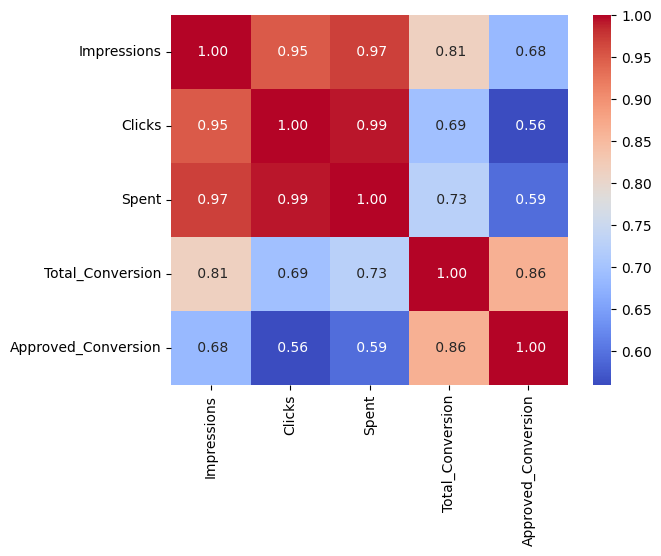

In [8]:
correlation_heatmap = sns.heatmap(df[[ "Impressions", "Clicks", "Spent", "Total_Conversion", "Approved_Conversion"]].corr(), annot=True, fmt=" .2f", cmap="coolwarm")

We see that Impressions and Total_conversion are the most correlated to Approved_Conversion as their heatmap values are 86% and 68%. There is a strong correlation between Spent and Clicks/ Impressions, but not Spent and Total_Conversion.

# Analysing different campaigns

In [9]:
df["xyz_campaign_id"].unique()

array([ 916,  936, 1178])

Company XYZ had 3 different ad campaign's as shown above. To analyse the performance of each individual campaign we need to replace their needs which in turn allows us to visualise the data better.

In [10]:
df["xyz_campaign_id"].replace({916: "campaign_a", 936: "campaign_b", 1178: "campaign_c"}, inplace = True)
df.head()

/var/folders/nf/h1bcvk_j5mzbzjq2fbfl54n40000gp/T/ipykernel_2212/1525101876.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["xyz_campaign_id"].replace({916: "campaign_a", 936: "campaign_b", 1178: "campaign_c"}, inplace = True)


,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,campaign_a,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,campaign_a,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,campaign_a,103920,30-34,M,20,693,0,0.00,1,0
3,708815,campaign_a,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,campaign_a,103928,30-34,M,28,4133,1,1.29,1,1


Displaying plot of each campaign

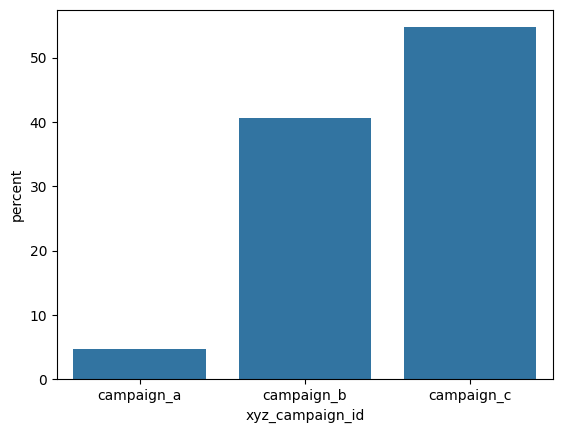

In [57]:
sns.countplot(x = 'xyz_campaign_id', data = df, stat = "percent")
plt.show()

We can see that over 50% of the ads were from campaign_c followed by roughly 40% from campaign_b and 5% from campaign_a. 

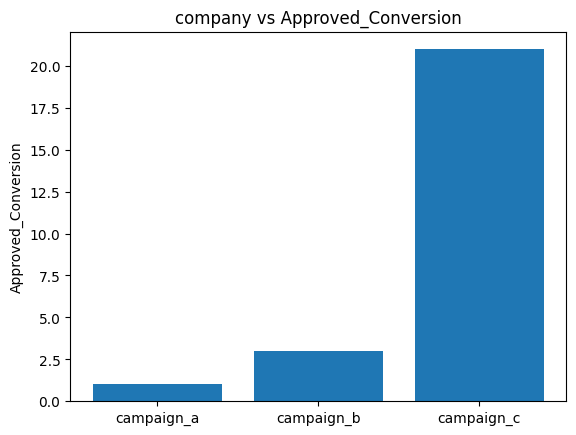

In [16]:
# Checking to see the number of Approved_conversions per campaign
plt.bar(df["xyz_campaign_id"], df["Approved_Conversion"])
plt.ylabel("Approved_Conversion")
plt.title("company vs Approved_Conversion")
plt.show()

Campaign C had the most approved conversions but also had the most ads.

## Calclating impressions to conversion ratio

In [48]:
#Counting the number of impressions for each ad campaign
campaign_impression_count = df.groupby("xyz_campaign_id")["Impressions"].sum()
print(campaign_impression_count)

xyz_campaign_id
campaign_a       482925
campaign_b      8128187
campaign_c    204823716
Name: Impressions, dtype: int64


In [49]:
# Counting the number of approved conversions for each campaign
approved_conversions_by_campaign = df.groupby(
    "xyz_campaign_id")["Approved_Conversion"].sum()
print(approved_conversions_by_campaign)

xyz_campaign_id
campaign_a     24
campaign_b    183
campaign_c    872
Name: Approved_Conversion, dtype: int64


In [51]:
# Calculating the ratio between the approved conversions and the number of ads for the campaign
conversion_to_count_ratio = (
    approved_conversions_by_campaign / campaign_impression_count).round(10)
print(conversion_to_count_ratio)

xyz_campaign_id
campaign_a    0.000050
campaign_b    0.000023
campaign_c    0.000004
dtype: float64


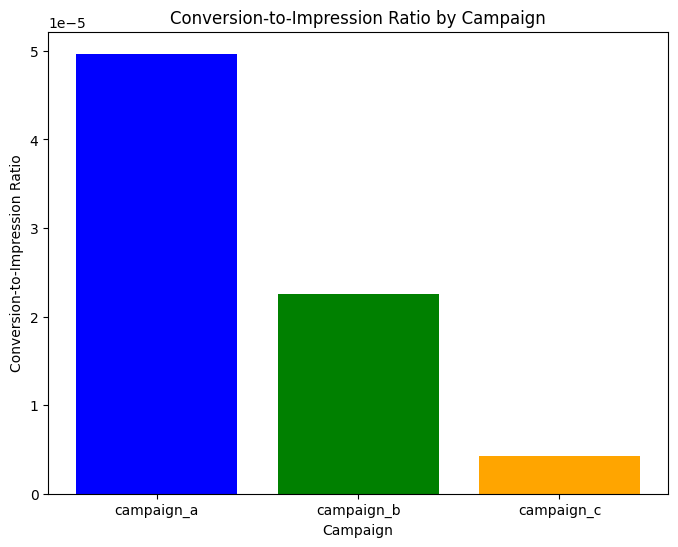

In [59]:
#Visual reprsentation
plt.figure(figsize=(8, 6))
plt.bar(conversion_to_count_ratio.index,
        conversion_to_count_ratio.values, color=['blue', 'green', 'orange'])

plt.title('Conversion-to-Impression Ratio by Campaign')
plt.xlabel('Campaign')
plt.ylabel('Conversion-to-Impression Ratio')

plt.show()

We've found that campaign_a had the best impression to conversion ratio, followed by campaign_b and campaign_c.

## Calculating the impression to click ratio

In [53]:
campaign_click_count = df.groupby("xyz_campaign_id")["Clicks"].sum()
print(campaign_click_count)

xyz_campaign_id
campaign_a      113
campaign_b     1984
campaign_c    36068
Name: Clicks, dtype: int64


In [61]:
click_to_impression_ratio = (
    campaign_click_count / campaign_impression_count).round(10)
print(click_to_impression_ratio)

xyz_campaign_id
campaign_a    0.000234
campaign_b    0.000244
campaign_c    0.000176
dtype: float64


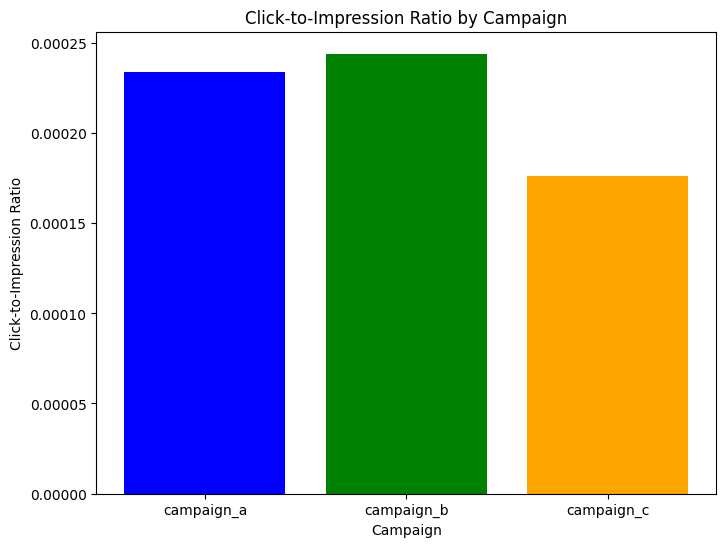

In [62]:
# Visual reprsentation
plt.figure(figsize=(8, 6))
plt.bar(click_to_impression_ratio.index,
        click_to_impression_ratio.values, color=['blue', 'green', 'orange'])

plt.title('Click-to-Impression Ratio by Campaign')
plt.xlabel('Campaign')
plt.ylabel('Click-to-Impression Ratio')

plt.show()

Campaign A and B performed really well in terms of turning the impressions to click's where as Campaign C struggled a bit in that regard.

## Checking distribution with age

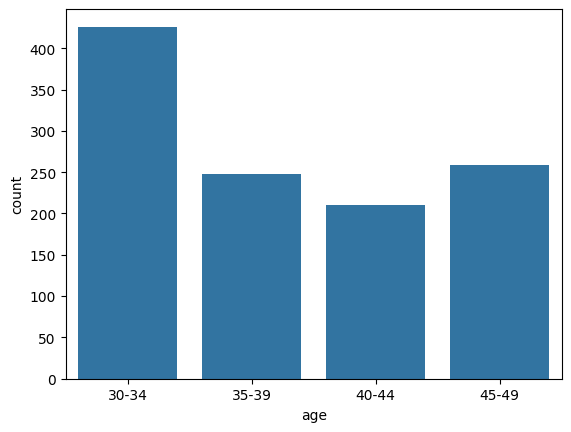

In [63]:
# Show the overall age distribution for the ads
sns.countplot(x = 'age', data = df)
plt.show()

<Axes: xlabel='xyz_campaign_id', ylabel='Approved_Conversion'>

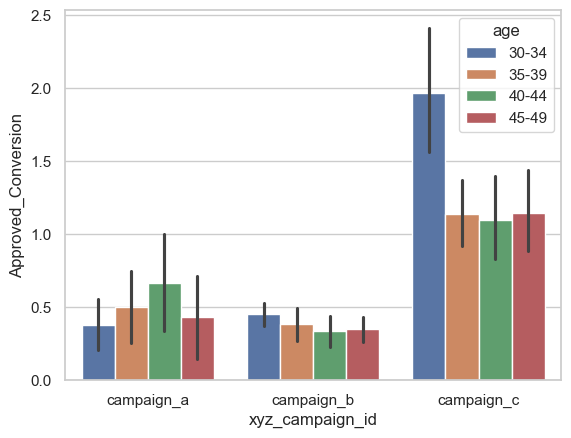

In [64]:
# Show the distribution of age for each campaign
sns.set(style = 'whitegrid')
tips = sns.load_dataset('tips')
sns.barplot(x = df["xyz_campaign_id"], y = df["Approved_Conversion"], hue = df["age"], data = tips)

Campaign C mainly converted customers aged 30-34, Campaign was quite equally distributed in the age groups it targeted and Campaign A did not follow the trend; mainly targeting those aged 40-44, followed by 35-39 and targeted those aged 30-34 the least.

## Checking gender distribution

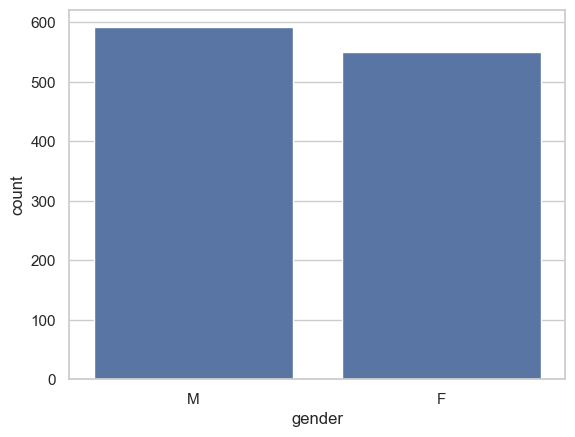

In [67]:
#Checking overall gender distribution
sns.countplot( x = "gender", data = df)
plt.show()

Almost equally distributed, men had slightly more impressions than women.

<Axes: xlabel='xyz_campaign_id', ylabel='Approved_Conversion'>

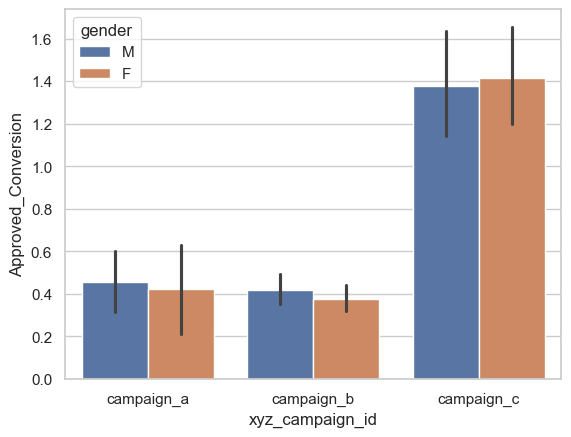

In [69]:
#Checking gender distribution for each add campaign
sns.set_style(style = "whitegrid")
tips = sns.load_dataset("tips")
sns.barplot(x = df["xyz_campaign_id"], y = df["Approved_Conversion"], hue = df["gender"], data = tips)

Also quite equally distributed for all ad campaigns. Campaign A and B converted men slightly more where as Campaign C targeted women slightly more.

## Relationship between Interest and Conversions

Plot to show how many people for each interest

<function matplotlib.pyplot.show(close=None, block=None)>

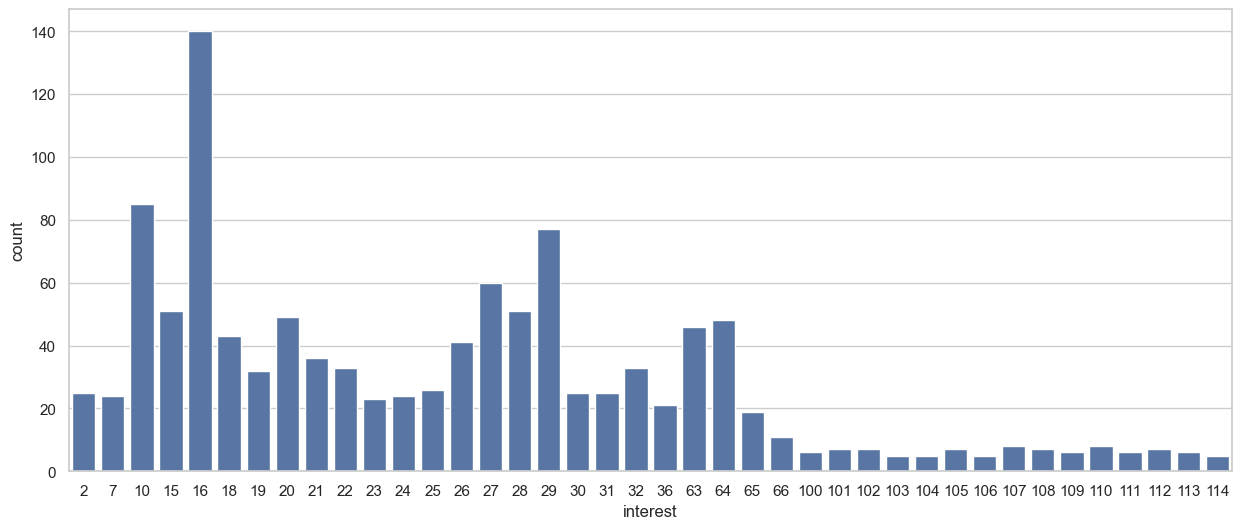

In [70]:
fig_dims = (15, 6)
fig, ax = plt.subplots(figsize = fig_dims)
sns.countplot(x = 'interest', data = df)

plt.show

Scatter plot to show Interest to Approved Conversion Relationship

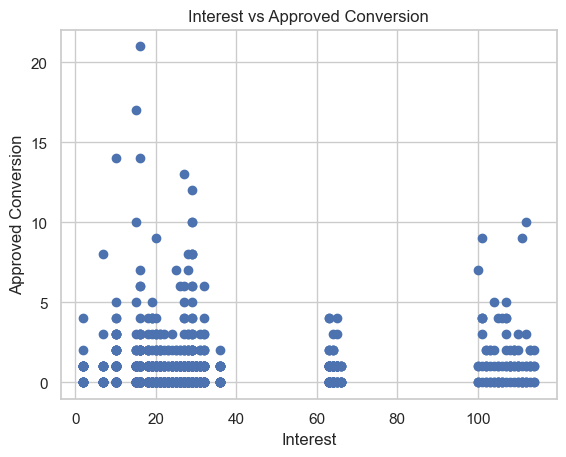

In [71]:
plt.scatter(df['interest'], df['Approved_Conversion'])
plt.title("Interest vs Approved Conversion")
plt.xlabel("Interest")
plt.ylabel("Approved Conversion")
plt.show()

Scatter plot shows what we would generally expect, more people interested leads to more approved conversions. Surprising that despite have less number of people interested in 100 there is a lot of approved conversion for this small amount of people.

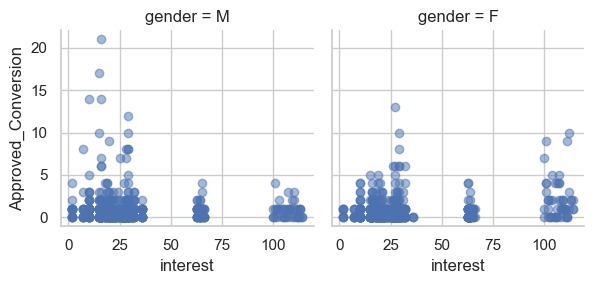

In [72]:
g = sns.FacetGrid(df, col = "gender")
g.map(plt.scatter, "interest", "Approved_Conversion", alpha = .5)
g.add_legend()

Men with interest range 1-20 have higher Approved_Conversion and women with interest range 100-114 have higher Approved_Conversion (than their respective counterparts)

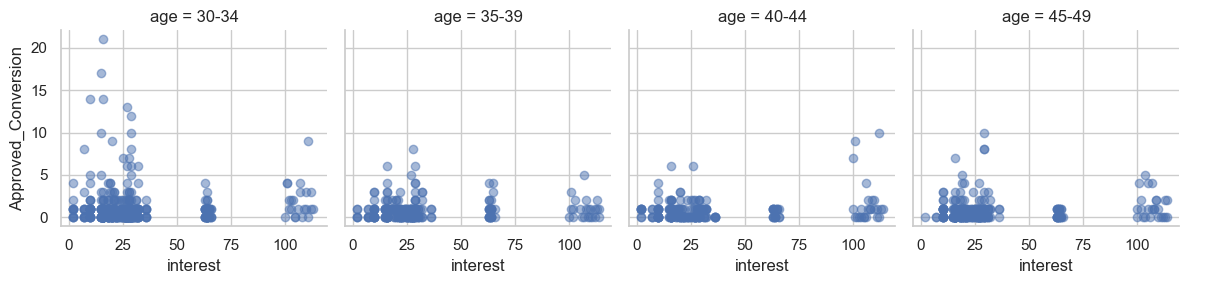

In [73]:
g = sns.FacetGrid(df, col="age")
g.map(plt.scatter, "interest", "Approved_Conversion", alpha=.5)
g.add_legend()

Most approved conversions in the age 30-34 range for the interest range 1-38